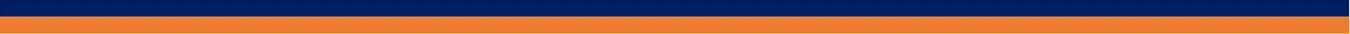

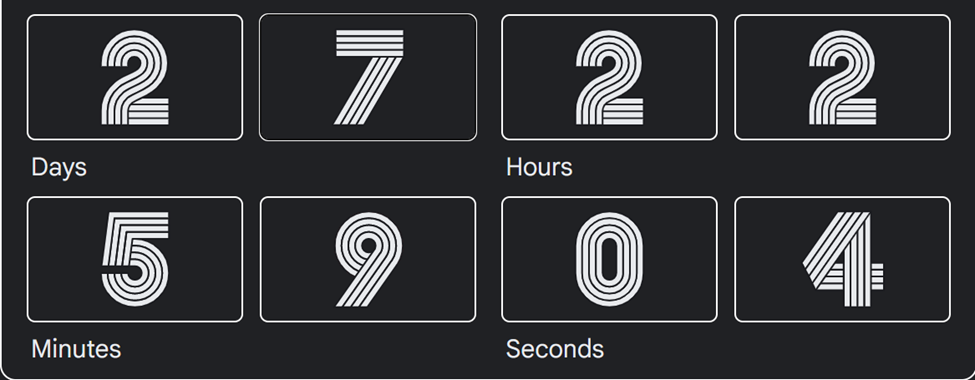

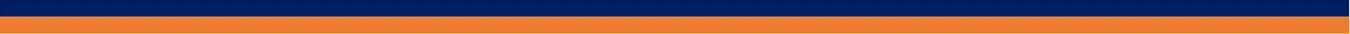


<h1><center><font size=10><a name='link6'>Data Science and Business Analytics</a></center></font></h1>


<h1><center> Practice Project Six </center></h1>

<h1><center>Portfolio Alloacation & Sharpe Ratio</center></h1>



<h1><center> By </center></h1>



<h1><center>Hayford Osumanu </center></h1>



<h1><center>April  2023 </center></h1>


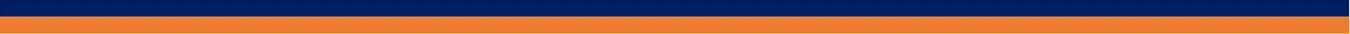

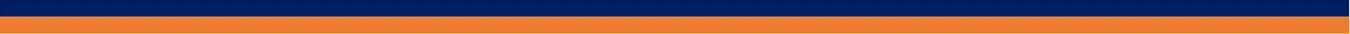

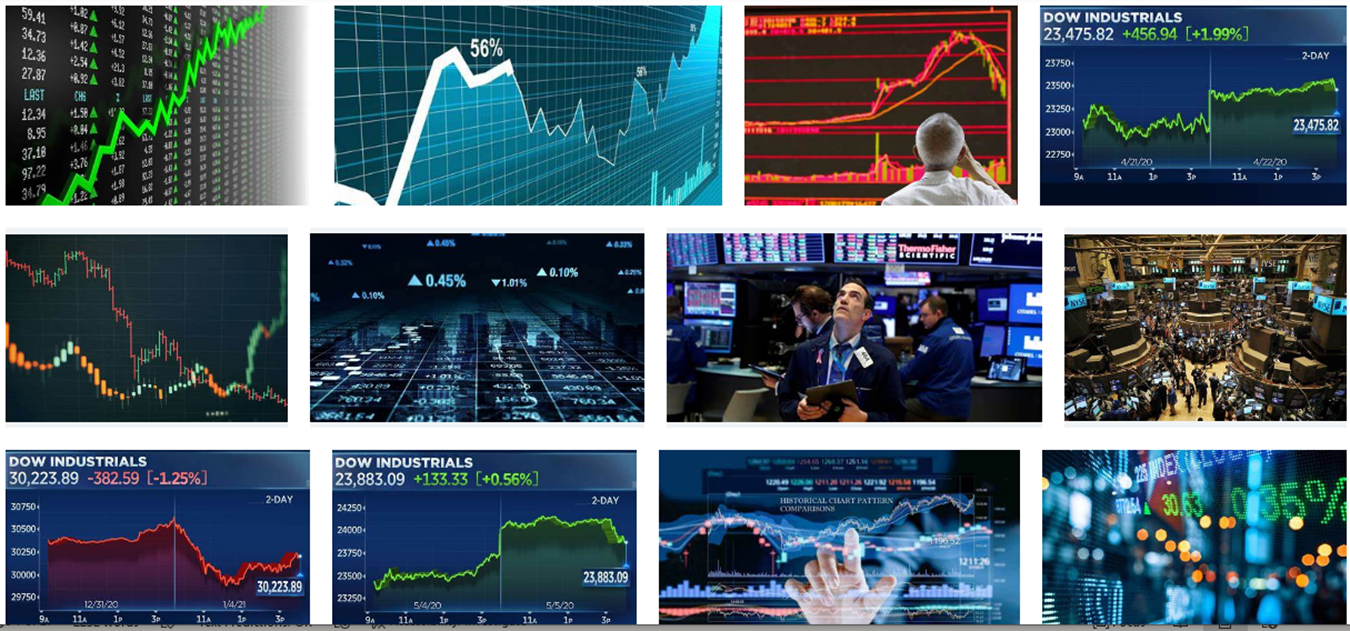

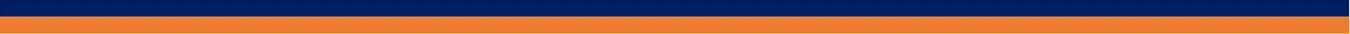

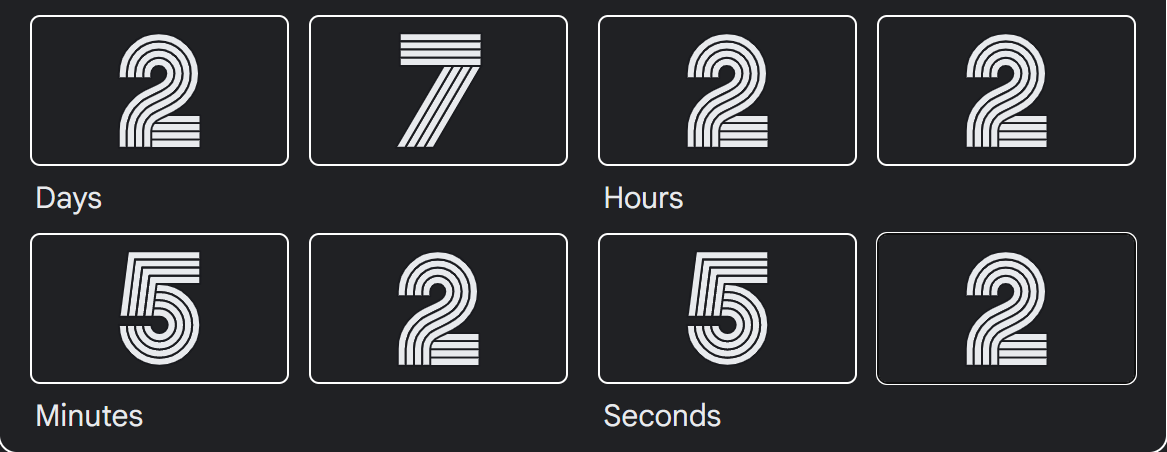

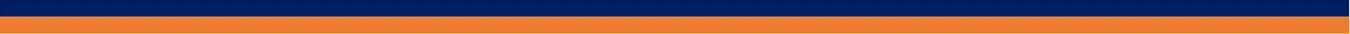

# Import Python Libraries

### Lets import all the needed libraries for our analysis

In [ ]:
import yahoo_fin.stock_info as si
# OR
from yahoo_fin.stock_info import*
import pandas as pd

In [ ]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import yahoo_fin.stock_info as si
# OR
from yahoo_fin.stock_info import*
import pandas as pd

In [ ]:
# First, we just need to load the stock_info module from yahoo_fin.
# import stock_info module from yahoo_fin
from yahoo_fin import stock_info as si
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

image.png

# Portfolio Optimization

In [ ]:
import yfinance as yahooFinance
import pandas as pd

# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y,
# 5y, 10y and ytd.
amzn = yahooFinance.Ticker("AMZN")
amazon = amzn.history(period="5y")
amazon['Date'] = pd.to_datetime(amazon.index).strftime('%m/%d/%y')

goog = yahooFinance.Ticker("GOOG")
google = goog.history(period="5y")
google['Date'] = pd.to_datetime(google.index).strftime('%m/%d/%y')

tsla = yahooFinance.Ticker("TSLA")
tesla = tsla.history(period="5y")
tesla['Date'] = pd.to_datetime(tesla.index).strftime('%m/%d/%y')

meta = yahooFinance.Ticker("META")
facebook = meta.history(period="5y")
facebook['Date'] = pd.to_datetime(facebook.index).strftime('%m/%d/%y')

In [ ]:
dfs = [amazon["Close"], google["Close"], tesla["Close"], facebook["Close"]]
df_combined = pd.concat(dfs, axis=1)
df_combined.columns = ['amazon', 'google', 'tesla', 'facebook']
df_combined.insert(0, 'Date', amazon['Date'])

In [ ]:
df_combined["Date"] = pd.to_datetime(df_combined["Date"], format="%m/%d/%y")
df_combined["Date"] = df_combined["Date"].astype(int)
stocks=df_combined.copy()

In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-04-16 00:00:00-04:00 to 2023-04-14 00:00:00-04:00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1259 non-null   int64  
 1   amazon    1259 non-null   float64
 2   google    1259 non-null   float64
 3   tesla     1259 non-null   float64
 4   facebook  1259 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


image.png

# Sharpe Ratio and Portfolio Values

## Create a Portfolio

In [ ]:
stocks.tail(8)

,Date,amazon,google,tesla,facebook
Date,,,,,
2023-04-04 00:00:00-04:00,1680566400000000000,103.95,105.12,192.58,214.72
2023-04-05 00:00:00-04:00,1680652800000000000,101.10,104.95,185.52,211.48
2023-04-06 00:00:00-04:00,1680739200000000000,102.06,108.90,185.06,216.10
2023-04-10 00:00:00-04:00,1681084800000000000,102.17,106.95,184.51,214.75
2023-04-11 00:00:00-04:00,1681171200000000000,99.92,106.12,186.79,213.85
2023-04-12 00:00:00-04:00,1681257600000000000,97.83,105.22,180.54,214.00
2023-04-13 00:00:00-04:00,1681344000000000000,102.40,108.19,185.90,220.35
2023-04-14 00:00:00-04:00,1681430400000000000,102.51,109.46,185.00,221.49


In [ ]:
for stock_df in (amazon,google,tesla,facebook):
    stock_df['Normed Return'] = stock_df['Close']/stock_df.iloc[0]['Close']

image.png

## Allocations

Let's pretend we had the following allocations for our total portfolio:

* 30% in Amazon
* 20% in Google
* 40% in Tesla
* 10% in Facebook(Meta)

Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [ ]:
for stock_df,allocation in zip([amazon,google,tesla,facebook],[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allocation

In [ ]:
amazon.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,Normed Return,Allocation
Date,,,,,,,,,,
2018-04-16 00:00:00-04:00,72.25,72.35,71.37,72.07,56172000,0.00,0.00,04/16/18,1.00,0.30
2018-04-17 00:00:00-04:00,73.11,75.36,72.85,75.19,102288000,0.00,0.00,04/17/18,1.04,0.31
2018-04-18 00:00:00-04:00,75.73,76.69,75.21,76.39,104550000,0.00,0.00,04/18/18,1.06,0.32
2018-04-19 00:00:00-04:00,77.16,78.43,76.95,77.85,130474000,0.00,0.00,04/19/18,1.08,0.32
2018-04-20 00:00:00-04:00,78.06,78.06,75.80,76.37,110832000,0.00,0.00,04/20/18,1.06,0.32


image.png

## Investment

Let's pretend we invested a million dollars in this portfolio

In [ ]:
for stock_df in [amazon,google,tesla,facebook]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

image.png

## Total Portfolio Value

In [ ]:
portfolio_val = pd.concat([amazon['Position Values'],google['Position Values'],tesla['Position Values'], facebook['Position Values']],axis=1)

In [ ]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2018-04-16 00:00:00-04:00,300000.00,200000.00,400000.00,100000.00
2018-04-17 00:00:00-04:00,312971.91,206971.24,395165.00,102323.61
2018-04-18 00:00:00-04:00,317968.79,206570.46,402939.48,100928.23
2018-04-19 00:00:00-04:00,324018.73,209580.15,412183.65,101983.86
2018-04-20 00:00:00-04:00,317895.94,206740.02,398667.63,100879.69


image.png

In [ ]:
portfolio_val.columns = ['amazon_position','google_position','tesla_position','facebook_position']

In [ ]:
portfolio_val.head()

,amazon_position,google_position,tesla_position,facebook_position
Date,,,,
2018-04-16 00:00:00-04:00,300000.00,200000.00,400000.00,100000.00
2018-04-17 00:00:00-04:00,312971.91,206971.24,395165.00,102323.61
2018-04-18 00:00:00-04:00,317968.79,206570.46,402939.48,100928.23
2018-04-19 00:00:00-04:00,324018.73,209580.15,412183.65,101983.86
2018-04-20 00:00:00-04:00,317895.94,206740.02,398667.63,100879.69


In [ ]:
portfolio_val['Total Position'] = portfolio_val.sum(axis=1)

In [ ]:
portfolio_val.head()

,amazon_position,google_position,tesla_position,facebook_position,Total Position
Date,,,,,
2018-04-16 00:00:00-04:00,300000.00,200000.00,400000.00,100000.00,1000000.00
2018-04-17 00:00:00-04:00,312971.91,206971.24,395165.00,102323.61,1017431.75
2018-04-18 00:00:00-04:00,317968.79,206570.46,402939.48,100928.23,1028406.96
2018-04-19 00:00:00-04:00,324018.73,209580.15,412183.65,101983.86,1047766.39
2018-04-20 00:00:00-04:00,317895.94,206740.02,398667.63,100879.69,1024183.28


image.png

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

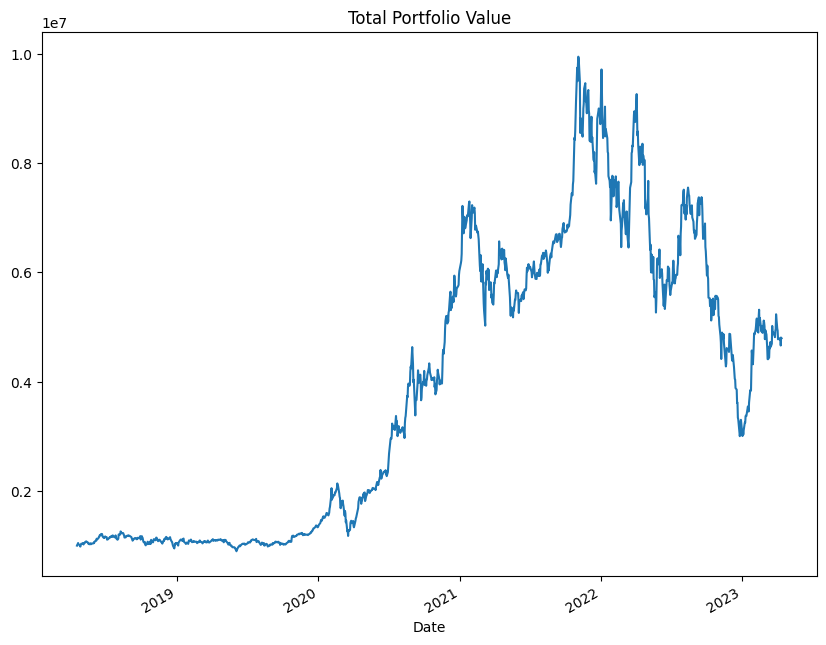

In [ ]:
portfolio_val['Total Position'].plot(figsize=(10,8))
plt.title('Total Portfolio Value');

image.png

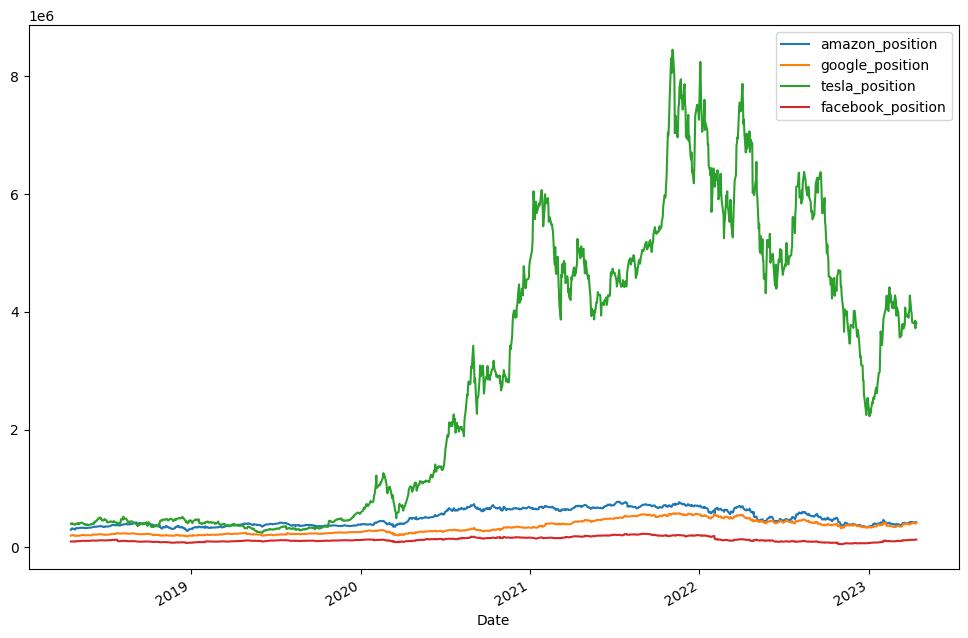

In [ ]:
portfolio_val.drop('Total Position',axis=1).plot(kind='line',figsize=(12,8))
plt.show();

image.png

In [ ]:
portfolio_val.tail(8)

,amazon_position,google_position,tesla_position,facebook_position,Total Position
Date,,,,,
2023-04-04 00:00:00-04:00,432674.30,405094.53,3967858.37,130267.55,4935894.76
2023-04-05 00:00:00-04:00,420811.67,404439.39,3822396.38,128301.88,4775949.33
2023-04-06 00:00:00-04:00,424807.50,419661.29,3812918.55,131104.78,4788492.11
2023-04-10 00:00:00-04:00,425265.36,412146.67,3801586.46,130285.75,4769284.24
2023-04-11 00:00:00-04:00,415900.11,408948.17,3848562.84,129739.73,4803150.86
2023-04-12 00:00:00-04:00,407200.86,405479.89,3719789.79,129830.73,4662301.27
2023-04-13 00:00:00-04:00,426222.71,416925.20,3830225.57,133683.19,4807056.68
2023-04-14 00:00:00-04:00,426680.57,421819.31,3811682.38,134374.81,4794557.07


image.png

# Portfolio Statistics
### Daily Returns

In [ ]:
portfolio_val['Daily Return'] = portfolio_val['Total Position'].pct_change(1)

### Cumulative Return

In [ ]:
cum_ret = 100 * (portfolio_val['Total Position'][-1]/portfolio_val['Total Position'][0] -1 )
print('Portfolio return is approximately: {} percent'.format(cum_ret))

Portfolio return is approximately: 379.45570718084633 percent


### Avg Daily Return

In [ ]:
portfolio_val['Daily Return'].mean()

0.0017229814091363341

### Std Daily Return

In [ ]:
portfolio_val['Daily Return'].std()

0.030845699379630415

image.png

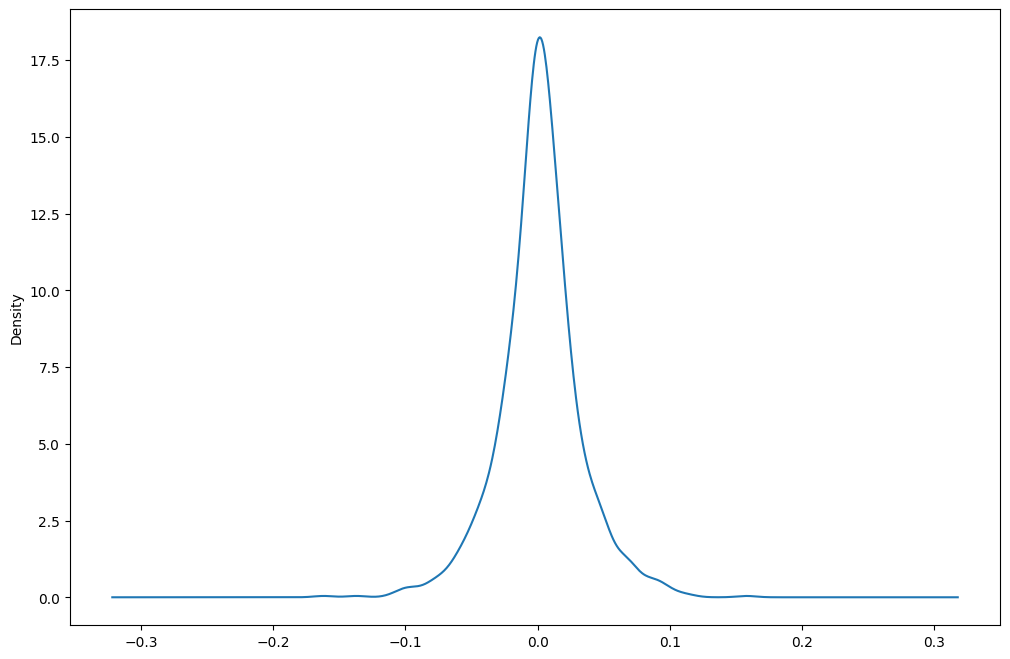

In [ ]:
portfolio_val['Daily Return'].plot(kind='kde',figsize=(12,8));

image.png

# Sharpe Ratio

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. 

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

In [ ]:
Sharpe_Ratio = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [ ]:
Sharpe_Ratio

0.055858075640656084

In [ ]:
Annualized_Sharpe_Ratio = (252**0.5)*Sharpe_Ratio

In [ ]:
Annualized_Sharpe_Ratio

0.8867194611588655

In [ ]:
portfolio_val['Daily Return'].std()

0.030845699379630415

In [ ]:
portfolio_val['Daily Return'].mean()

0.0017229814091363341

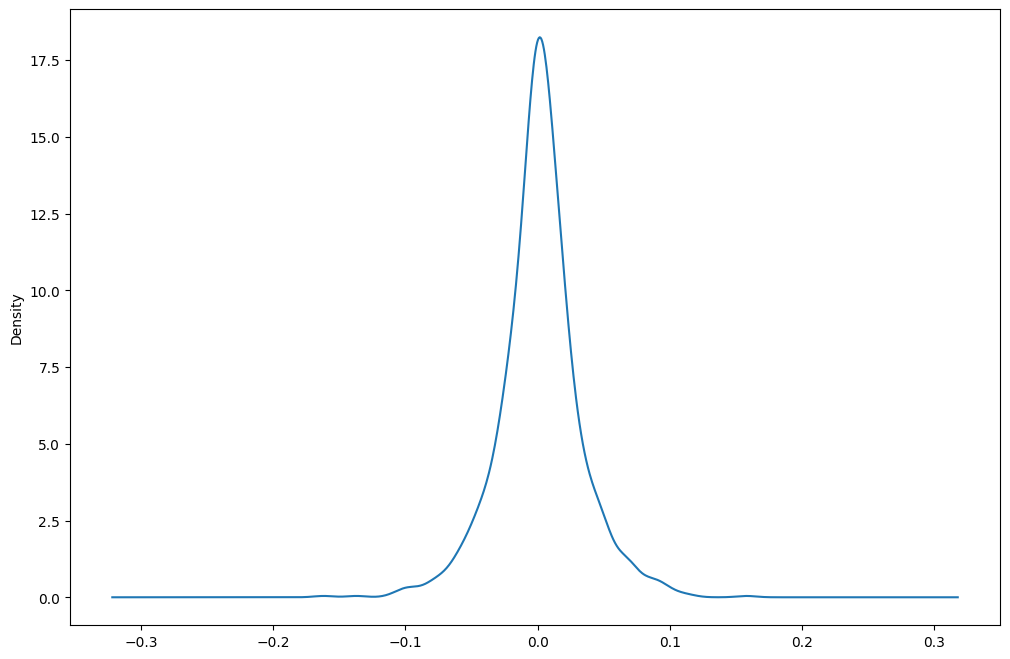

In [ ]:
portfolio_val['Daily Return'].plot(kind='kde',figsize=(12,8));

image.png

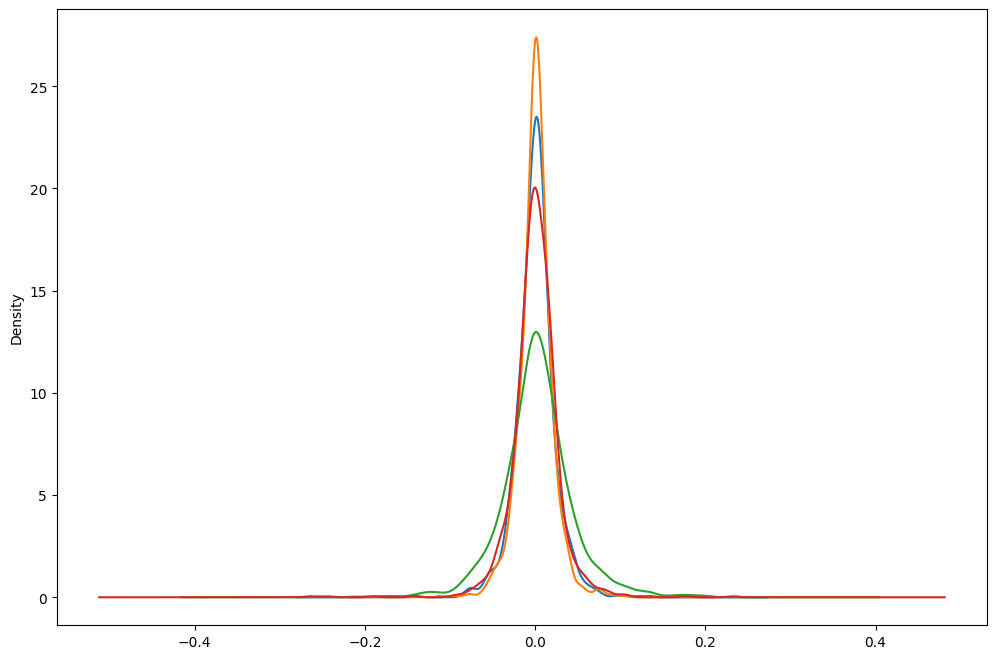

In [ ]:

amazon['Close'].pct_change(1).plot(kind='kde',figsize=(12,8))
google['Close'].pct_change(1).plot(kind='kde',figsize=(12,8))
tesla['Close'].pct_change(1).plot(kind='kde',figsize=(12,8))
facebook['Close'].pct_change(1).plot(kind='kde',figsize=(12,8));

In [ ]:
import numpy as np
np.sqrt(252)* (np.mean(.001-0.0002)/.001)

12.699606293110037

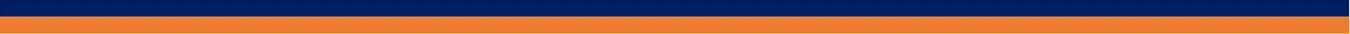